In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
os.chdir(r"C:\Users\dai\Desktop\S-AI\MachineLearning\Day1\Datasets")

In [3]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv',index_col=0)
milk

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727
...,...
1975-08,858
1975-09,817
1975-10,827


In [4]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1962-01 to 1975-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Milk    168 non-null    int64
dtypes: int64(1)
memory usage: 2.6+ KB


In [5]:
milk.isna().sum()

Milk    0
dtype: int64

In [6]:
# temporal train test split
y = milk['Milk']
y_train = y[:156]
y_test = y[156:]
y_train.shape, y_test.shape

((156,), (12,))

In [7]:
# Holt winters additive method to forecast time series values

In [8]:
holt_w = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
# alpha, beta, gamma = 0.2, 0.4, 0.5
# alpha is for level, beta is for the trend component and gamma is for additive seasonality
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma
holt_w_fit = holt_w.fit()
holt_w_fcast = holt_w_fit.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [126]:
holt_w.params

{'smoothing_level': 0.9999999849726197,
 'smoothing_trend': 1.9358928306179758e-10,
 'smoothing_seasonal': 7.144583838012828e-09,
 'damping_trend': 0.9949999999142464,
 'initial_level': 422.47429167151614,
 'initial_trend': 1.6635962145858316,
 'initial_seasons': array([1.38872795, 1.31452917, 1.4899152 , 1.5186296 , 1.63369197,
        1.58016394, 1.48635135, 1.40691283, 1.32619814, 1.33219516,
        1.27337064, 1.34177174]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [9]:
# A series to store the forecasted values of y_test
holt_w_fcast_ser = pd.Series(holt_w_fcast, index=y_test.index)
holt_w_fcast_ser

Month
1975-01    841.898995
1975-02    801.772723
1975-03    905.582801
1975-04    917.823540
1975-05    979.981505
1975-06    952.971755
1975-07    909.313082
1975-08    865.873642
1975-09    817.407791
1975-10    822.112985
1975-11    789.553087
1975-12    833.994580
dtype: float64

In [10]:
# rmse of the test set and predicted values
error = round(root_mean_squared_error(y_test,holt_w_fcast_ser), 3)
error

11.93

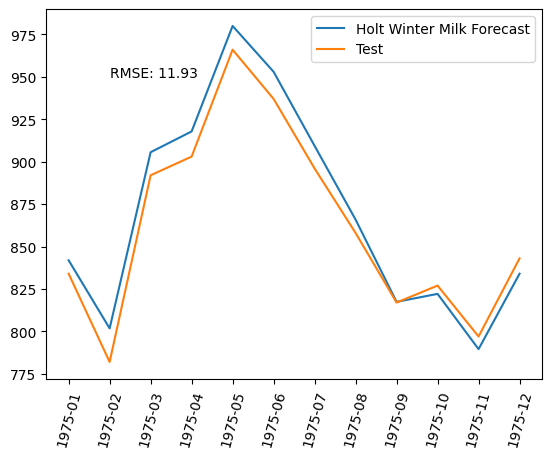

In [11]:
plt.text(1,950,'RMSE: '+str(error))
plt.plot(holt_w_fcast_ser, label='Holt Winter Milk Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [12]:
# checking params.
holt_w.params

{'smoothing_level': 0.6986924012025397,
 'smoothing_trend': 1.736311705715619e-08,
 'smoothing_seasonal': 0.21196842825739115,
 'damping_trend': nan,
 'initial_level': 607.5000115241079,
 'initial_trend': 1.617091308976162,
 'initial_seasons': array([-20.2625545 , -49.40810858,  34.91864126,  49.33206214,
        114.4219989 ,  87.94060471,  30.32737571, -17.57131243,
        -58.15148299, -55.32905967, -78.77926304, -44.0206181 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [13]:
# doing the same for holt winters additive damped forecast

In [14]:
holt_w = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add',damped_trend=True)
# alpha, beta, gamma = 0.2, 0.4, 0.5
# alpha is for level, beta is for the trend component and gamma is for additive seasonality
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma
holt_w_fit = holt_w.fit()
holt_w_fcast = holt_w_fit.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
# A series to store the forecasted values of y_test
holt_w_fcast_ser = pd.Series(holt_w_fcast, index=y_test.index)
holt_w_fcast_ser

Month
1975-01    841.131664
1975-02    800.467766
1975-03    903.712180
1975-04    915.398124
1975-05    976.973553
1975-06    949.374168
1975-07    905.112185
1975-08    861.076701
1975-09    812.019691
1975-10    816.121243
1975-11    782.959818
1975-12    826.623438
dtype: float64

In [16]:
# rmse of the test set and predicted values
error = round(root_mean_squared_error(y_test,holt_w_fcast_ser), 3)
error

11.752

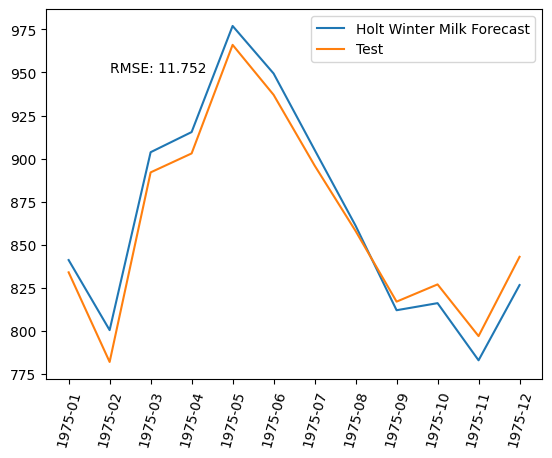

In [17]:
plt.text(1,950,'RMSE: '+str(error))
plt.plot(holt_w_fcast_ser, label='Holt Winter Milk Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [18]:
# checking params here also, after autotuning
holt_w.params

{'smoothing_level': 0.6970637733786135,
 'smoothing_trend': 9.738858848528262e-07,
 'smoothing_seasonal': 0.21179841987963208,
 'damping_trend': 0.9949980209932205,
 'initial_level': 606.7162599591019,
 'initial_trend': 2.3070790516850126,
 'initial_seasons': array([-20.23215467, -49.43082852,  34.90357245,  49.30093163,
        114.36618411,  87.87168051,  30.24734453, -17.65968633,
        -58.24130837, -55.42232966, -78.9048949 , -44.1725092 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [19]:
# holt winters multiplicative trend forecast

In [20]:
holt_w = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
# alpha, beta, gamma = 0.2, 0.4, 0.5
# alpha is for level, beta is for the trend component and gamma is for additive seasonality
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma
holt_w_fit = holt_w.fit()
holt_w_fcast = holt_w_fit.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
# A series to store the forecasted values of y_test
holt_w_fcast_ser = pd.Series(holt_w_fcast, index=y_test.index)
holt_w_fcast_ser

Month
1975-01    843.077757
1975-02    799.625368
1975-03    908.095901
1975-04    927.384845
1975-05    999.561310
1975-06    968.671436
1975-07    912.897270
1975-08    865.744432
1975-09    817.614526
1975-10    822.840245
1975-11    787.975941
1975-12    831.831420
dtype: float64

In [22]:
# rmse of the test set and predicted values
error = round(root_mean_squared_error(y_test,holt_w_fcast_ser), 3)
error

18.133

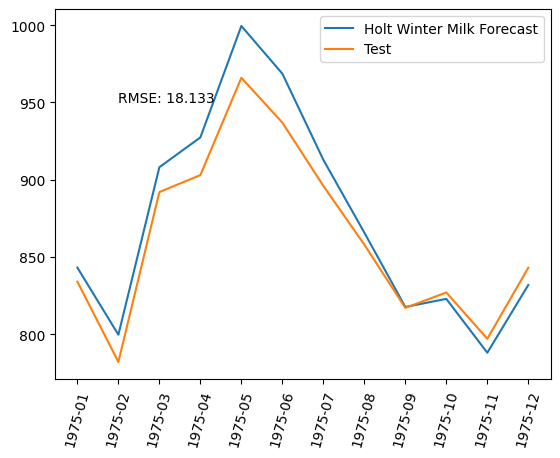

In [23]:
plt.text(1,950,'RMSE: '+str(error))
plt.plot(holt_w_fcast_ser, label='Holt Winter Milk Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [24]:
# checking params here also, after autotuning
holt_w.params

{'smoothing_level': 0.9999999809626738,
 'smoothing_trend': 2.0340116235314305e-08,
 'smoothing_seasonal': 2.971435245701535e-09,
 'damping_trend': nan,
 'initial_level': 481.17587599133356,
 'initial_trend': 1.3305574008647674,
 'initial_seasons': array([1.22069681, 1.15555566, 1.30979025, 1.33504949, 1.43620268,
        1.38916331, 1.30668472, 1.23683647, 1.16586003, 1.17108964,
        1.11935007, 1.17941924]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [25]:
# holt winters multiplicative trend damping forecast


In [26]:
holt_w = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul', damped_trend=True)
# alpha, beta, gamma = 0.2, 0.4, 0.5
# alpha is for level, beta is for the trend component and gamma is for additive seasonality
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma
holt_w_fit = holt_w.fit()
holt_w_fcast = holt_w_fit.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
# A series to store the forecasted values of y_test
holt_w_fcast_ser = pd.Series(holt_w_fcast, index=y_test.index)
holt_w_fcast_ser

Month
1975-01    842.503177
1975-02    798.479330
1975-03    906.130451
1975-04    924.726761
1975-05    996.003397
1975-06    964.536325
1975-07    908.365145
1975-08    860.846006
1975-09    812.424070
1975-10    817.062199
1975-11    781.901121
1975-12    824.863790
dtype: float64

In [28]:
# rmse of the test set and predicted values
error = round(root_mean_squared_error(y_test,holt_w_fcast_ser), 3)
error

17.107

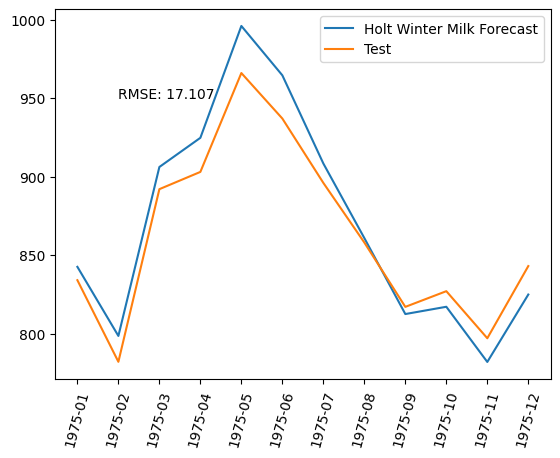

In [29]:
plt.text(1,950,'RMSE: '+str(error))
plt.plot(holt_w_fcast_ser, label='Holt Winter Milk Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [30]:
# checking params here also, after autotuning
holt_w.params

{'smoothing_level': 0.9999999849726197,
 'smoothing_trend': 1.9358928306179758e-10,
 'smoothing_seasonal': 7.144583838012828e-09,
 'damping_trend': 0.9949999999142464,
 'initial_level': 422.47429167151614,
 'initial_trend': 1.6635962145858316,
 'initial_seasons': array([1.38872795, 1.31452917, 1.4899152 , 1.5186296 , 1.63369197,
        1.58016394, 1.48635135, 1.40691283, 1.32619814, 1.33219516,
        1.27337064, 1.34177174]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# resampling to year and conducting the same algorithms on milk dataset

In [32]:
milk.index = pd.to_datetime(milk.index)
type(milk.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [33]:
# Resample the data to annual frequency and calculate the sum
milk_annual = milk.resample('A').sum()
milk_annual.index.rename('Year',inplace=True)
# Display the result
print(milk_annual)

             Milk
Year             
1962-12-31   7389
1963-12-31   7560
1964-12-31   7905
1965-12-31   8077
1966-12-31   8505
1967-12-31   8795
1968-12-31   8986
1969-12-31   9167
1970-12-31   9384
1971-12-31  10009
1972-12-31  10250
1973-12-31  10111
1974-12-31  10301
1975-12-31  10352


C:\Users\dai\AppData\Local\Temp\ipykernel_31792\2207491641.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  milk_annual = milk.resample('A').sum()


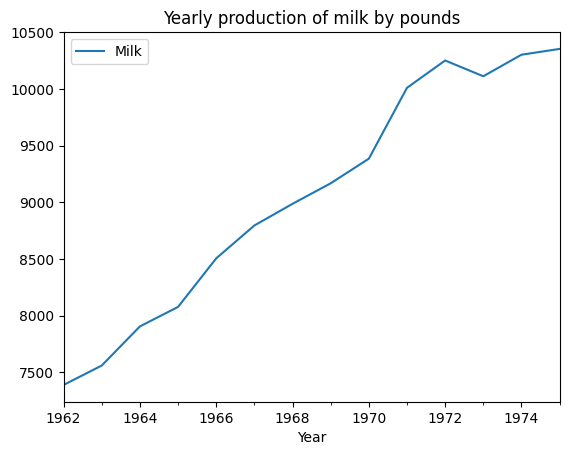

In [34]:
# checking the type of graph(linear or exponential)
milk_annual.plot()
plt.title("Yearly production of milk by pounds")
plt.show()

In [35]:
# temporal train test split
y = milk_annual['Milk'] # set the target variable and then split it into two parts. Here we are taking the last 3 rows as test
y_train = y[:-3]
y_test = y[-3:]
y_train.shape, y_test.shape

((11,), (3,))

In [36]:
# holt's linear trend for linear trends(increasing and decreasing) and since there's no seasonal component in the yearly production data. with damping
holt_linear = Holt(y_train,damped_trend=True)
alpha, beta, phi = 0.1, 0.3, 0.99999
fit_milk = holt_linear.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi) 
fcast_milk = fit_milk.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


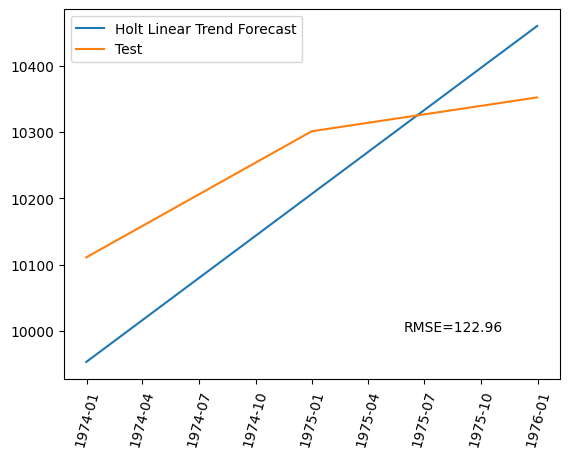

In [37]:
# plotting graph to visualize the predicted values
holt_linear_fcast = pd.Series(fcast_milk, index=y_test.index)
rmse = round(root_mean_squared_error(y_test, holt_linear_fcast), 2)
plt.text(1974,10000,'RMSE='+str(rmse))
plt.plot(holt_linear_fcast, label='Holt Linear Trend Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [38]:
holt_linear.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.3,
 'smoothing_seasonal': nan,
 'damping_trend': 0.99999,
 'initial_level': 7389.0,
 'initial_trend': 171.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Beer production dataset monthly forecasting

In [40]:
beer = pd.read_csv('monthly-beer-production-in-austr.csv',index_col=0)
beer

,Monthly beer production
Month,
1956-01,93.2
1956-02,96.0
1956-03,95.2
1956-04,77.1
1956-05,70.9
...,...
1995-04,127.0
1995-05,151.0
1995-06,130.0


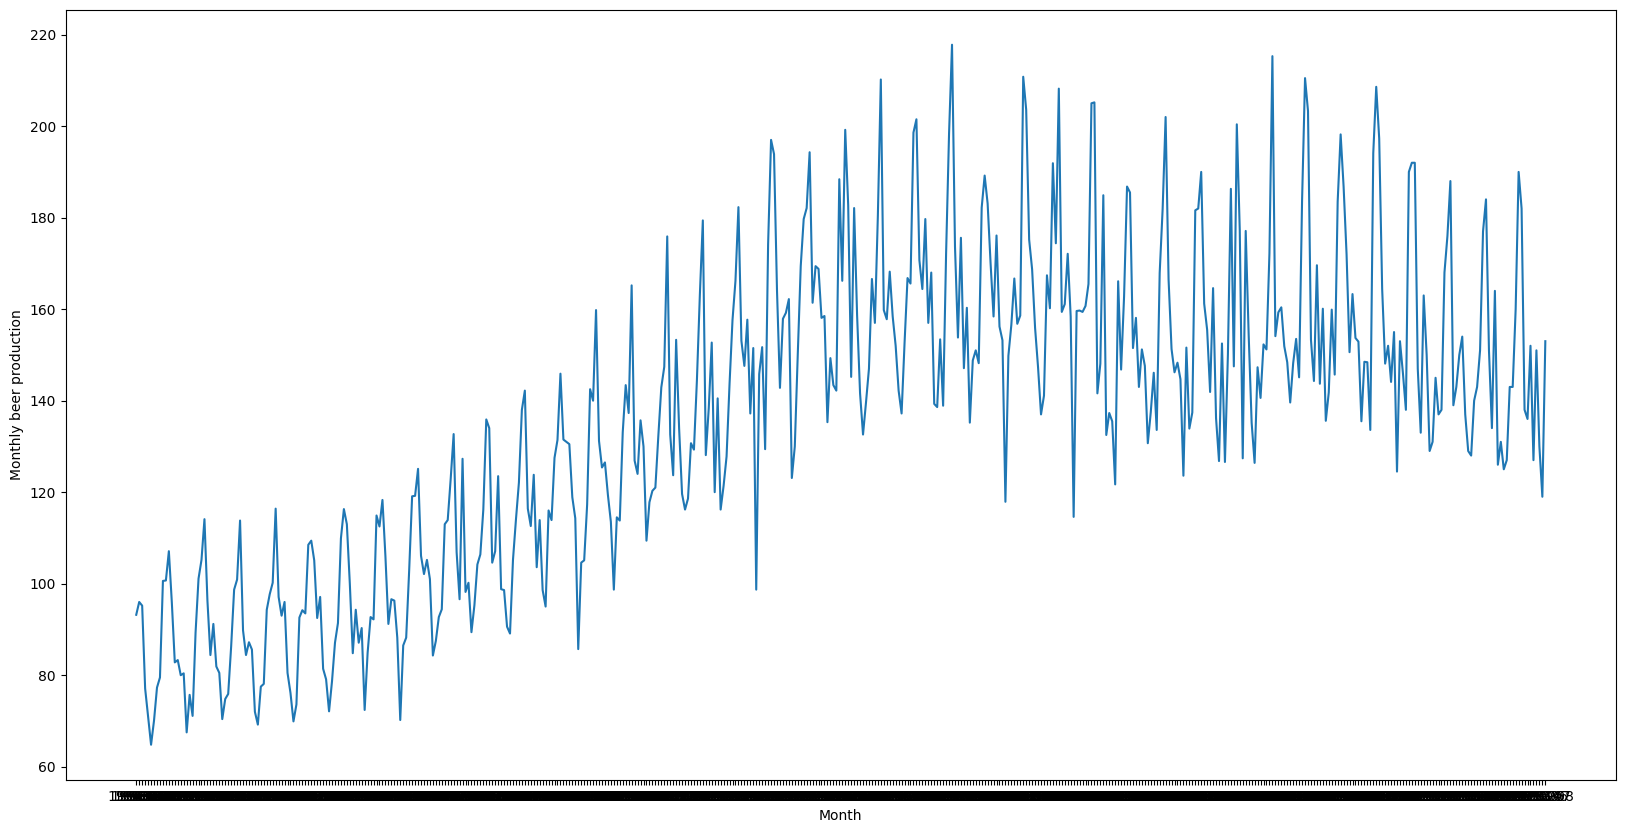

In [41]:
# plotting the graph to visualize trends in monthly beer production
plt.figure(figsize=(20,10))
sns.lineplot(x=beer.index,y=beer['Monthly beer production'])
plt.show()

#### We should use holt-winters trend forecasting algorithms to predict the trend of such a distribution of monthly production. It has trend and seasonal components along with exponential growth and plateauing at the end


In [43]:
# temporal train test split
y = beer['Monthly beer production']
y_train = y[:-24]
y_test = y[-24:]
y_train.shape,y_test.shape

((452,), (24,))

In [44]:
# holt winters additive trend forecasting

In [45]:
alpha, beta, gamma = 0.1, 0.3, 0.05
hw_beer_add = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
hw_add_fit = hw_beer_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
hw_add_fcast = hw_add_fit.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
# comparing the test set and the predicted values against each other, using rmse
hw_beer_fcast = pd.Series(hw_add_fcast, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,hw_beer_fcast),2)
rmse

9.38

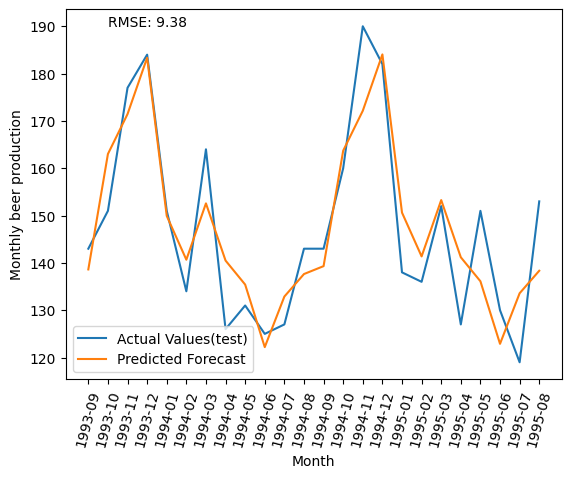

In [47]:
# now plotting the lineplot for the same
plt.text(1,190,'RMSE: '+str(rmse))
sns.lineplot(y_test, label='Actual Values(test)')
sns.lineplot(hw_beer_fcast,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [48]:
hw_beer_add.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.3,
 'smoothing_seasonal': 0.05,
 'damping_trend': nan,
 'initial_level': 86.29340459914368,
 'initial_trend': -0.48235976669863734,
 'initial_seasons': array([  4.18980081,  -3.72886334,   5.71856099,  -7.0880144 ,
        -11.15177827, -23.74323381, -14.92532171,  -9.018718  ,
         -3.59433523,  13.46509546,  20.10008546,  30.97070497]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

#### Now checking using damped holt winters additive trend forecasting algorithm

In [50]:
alpha, beta, gamma = 0.1, 0.3, 0.05
hw_beer_add_damp = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add', damped_trend=True)
hw_add_damp_fit = hw_beer_add_damp.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
hw_add_damp_fcast = hw_add_damp_fit.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
# comparing the test set and the predicted values against each other, using rmse
hw_beer_damp_fcast = pd.Series(hw_add_damp_fcast, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,hw_beer_damp_fcast),2)
rmse

9.49

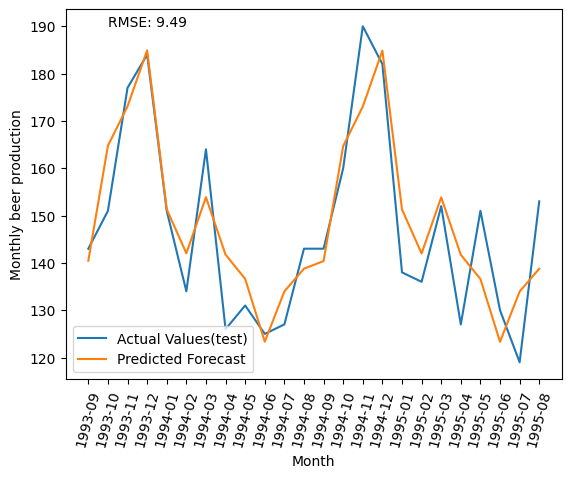

In [52]:
# now plotting the lineplot for the same
plt.text(1,190,'RMSE: '+str(rmse))
sns.lineplot(y_test, label='Actual Values(test)')
sns.lineplot(hw_beer_damp_fcast,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [53]:
# checking the parameters that were autotuned
hw_beer_add_damp.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.3,
 'smoothing_seasonal': 0.05,
 'damping_trend': 0.8600882134942065,
 'initial_level': 92.36376164350663,
 'initial_trend': -1.9611394705424632,
 'initial_seasons': array([  4.52499766,  -3.37482186,   6.09850341,  -6.68285772,
        -10.71687119, -23.27079837, -14.40686743,  -8.45186663,
         -2.95592407,  14.13965306,  20.78601208,  31.64532466]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

#### Using holt winters multiplicative trend forecasting

In [55]:
alpha, beta, gamma = 0.1, 0.3, 0
hw_beer_mul = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul')
hw_mul_fit = hw_beer_mul.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
hw_mul_fcast = hw_mul_fit.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
# comparing the test set and the predicted values against each other, using rmse
hw_beer_fcast = pd.Series(hw_mul_fcast, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,hw_beer_fcast),2)
rmse

9.42

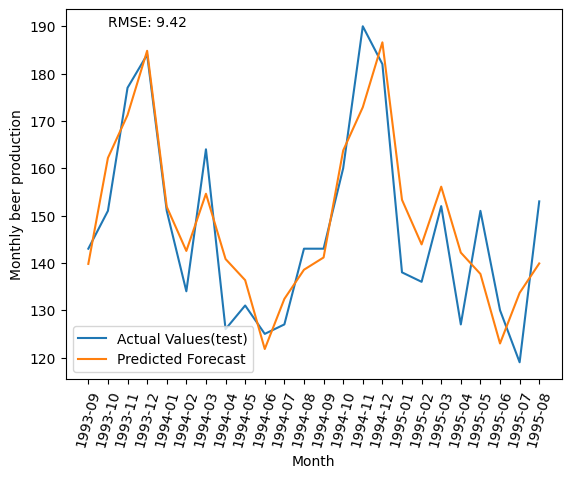

In [57]:
# now plotting the lineplot for the same
plt.text(1,190,'RMSE: '+str(rmse))
sns.lineplot(y_test, label='Actual Values(test)')
sns.lineplot(hw_beer_fcast,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [58]:
# checking the parameters that were autotuned
hw_beer_mul.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.3,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 76.38134655992653,
 'initial_trend': -0.10478862635643316,
 'initial_seasons': array([1.13291341, 1.06245554, 1.15158932, 1.04800807, 1.01392406,
        0.90503224, 0.98294341, 1.02785283, 1.04622359, 1.21284881,
        1.27953676, 1.37989449]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

#### Holt winters multiplicative damping trend forecasting

In [60]:
alpha, beta, gamma = 0.05, 0.5, 0
hw_beer_mul_damp = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul', damped_trend=True)
hw_mul_damp_fit = hw_beer_mul_damp.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
hw_mul_damp_fcast = hw_mul_damp_fit.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
# comparing the test set and the predicted values against each other, using rmse
hw_beer_damp_fcast = pd.Series(hw_mul_damp_fcast, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,hw_beer_damp_fcast),2)
rmse

9.4

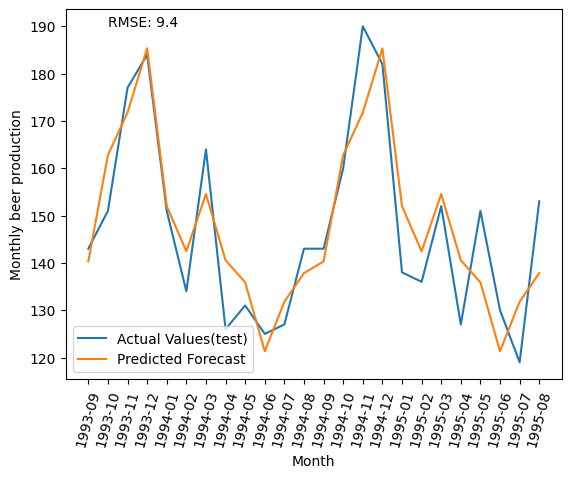

In [62]:
# now plotting the lineplot for the same
plt.text(1,190,'RMSE: '+str(rmse))
sns.lineplot(y_test, label='Actual Values(test)')
sns.lineplot(hw_beer_damp_fcast,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

In [63]:
# checking the parameters that were autotuned
hw_beer_mul_damp.params

{'smoothing_level': 0.05,
 'smoothing_trend': 0.5,
 'smoothing_seasonal': 0.0,
 'damping_trend': 0.9050038732473125,
 'initial_level': 61.00727312738415,
 'initial_trend': -0.21894934863208673,
 'initial_seasons': array([1.45665373, 1.36513754, 1.48108597, 1.34713958, 1.30231635,
        1.16269864, 1.26306907, 1.3210307 , 1.34455665, 1.56001401,
        1.6459842 , 1.77617518]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## RMSE scores of every algorithm tested(with autotuned parameters):
### RMSE score: Lower is better
#### 1. HW additive: 11.85
#### 2. HW additive(damped): 10.47
#### 3. HW multiplicative: 11.71
#### 4. HW multiplicative(damped): 10.2

## RMSE scores of every algorithm tested(after tuning the parameters):
### RMSE score: Lower is better
#### 1. HW additive: 9.38
#### 2. HW additive(damped): 9.55
#### 3. HW multiplicative: 9.42
#### 4. HW multiplicative(damped): 9.4

# BoxCox transformation from scipy:
#### The Box-Cox transformation is a family of power transformations used to stabilize variance and make a dataset more closely resemble a normal distribution. It is often used when data exhibits non-constant variance (heteroscedasticity) or is skewed.

In [67]:
# applying it to the above code
from scipy.special import boxcox, inv_boxcox
lamb = 0.1
y = beer['Monthly beer production']
y_train = y[:-24]
y_test = y[-24:]
y_train.shape,y_test.shape

((452,), (24,))